In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit
%matplotlib inline


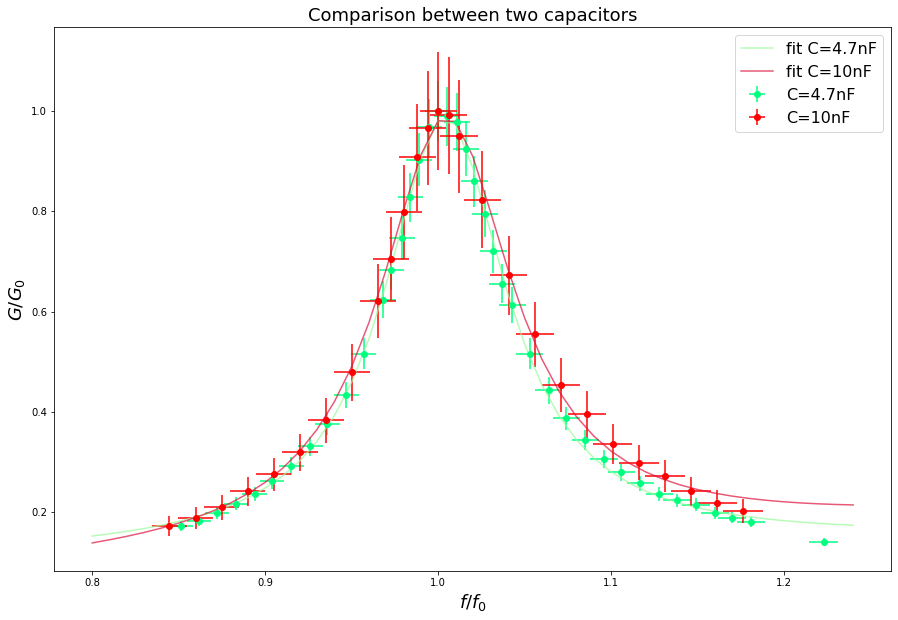

In [113]:
lor_5=pd.read_csv('47nF.txt')
lor_10=pd.read_csv('10nF.txt')

f1 = lor_5['Frequenze normalizzate']
G1 = lor_5['Guadagni normalizzati']
errf1 = lor_5['errF']
errG1 = lor_5['errG']

f2 = lor_10['Frequenze normalizzate']
G2 = lor_10['Guadagni normalizzati']
errf2 = lor_10['errF']
errG2 = lor_10['errG']

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit= np.arange(0.8,1.25,0.01)

fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='springgreen', fmt='o',label='C=4.7nF')
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='red', fmt='o',label='C=10nF')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [0.8, 1, -0.08, 0.01, 0])
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [0.8, 1, -0.08, 0.01, 0])
plt.plot(x_fit,lorentzian(x_fit,*p_1), '-', color='palegreen', alpha=0.7, label='fit C=4.7nF')
plt.plot(x_fit,lorentzian(x_fit,*p_2), '-', color='crimson', alpha=0.7, label='fit C=10nF')


plt.title('Comparison between two capacitors',fontsize=18)
plt.xlabel('$f/f_0$',fontsize=18)
plt.ylabel('$G/G_0$',fontsize=18)
plt.legend(fontsize=16)
plt.show()

In [68]:
f_0=p_1[1]*94
print('la frequenza di risonanza per C=4.7 nF è', f_0)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n*47.435
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 , 'mH')

la frequenza di risonanza per C=4.7 nF è 94.38837466599533
il guadagno massimo per C=4.7nF è 46.93568719631807 
 la resistenza dei fili è invece di 11.769566562185968 \pm 0.30625722715243764
la induttanza è di  0.0006049303719520287 H per cui  0.6049303719520287 mH


In [65]:
print('errore nella misura di r', (0.1**2+0.1**2)**(1/2))
l=14.8*1e-3
r=3.2*1e-3
mu_0=1.26*1e-6
L_th=mu_0*500**2*np.pi*r**2/l
print('the theorical value for the inductance is',L_th)

errl=0.1
errr=0.1
deL=((mu_0*2*500**2*np.pi*r/l)**2*errr**2+(mu_0*2*500**2*np.pi*r**2/l**2)**2*errl**2)**(1/2)
print('la induttanza è',L_th,'\pm',deL, 'mH')
c=1e9/(4*np.pi**2*100**2*1e6*L_th)
print(c)

errore nella misura di r 0.14142135623730953
the theorical value for the inductance is 0.0006846973826634619
la induttanza è 0.0006846973826634619 \pm 0.043782449579301844 mH
3.699487766705052


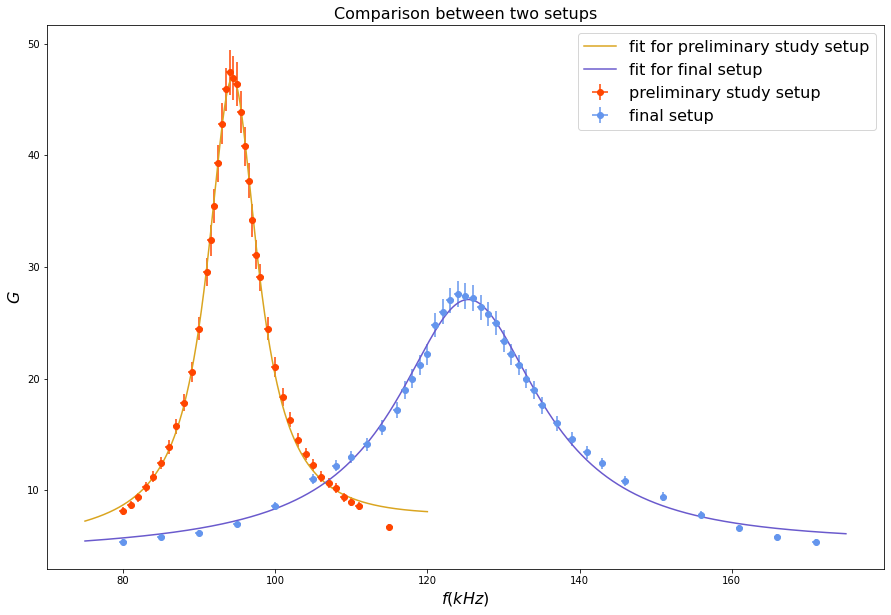

In [88]:
lor_5=pd.read_csv('47nF_nonorm.txt')
lor_10=pd.read_csv('Car_Prova_3-1.txt')

f1 = lor_5['Frequenze']
G1 = lor_5['Guadagni']
errf1 = lor_5['errF']
errG1 = lor_5['errG']

f2 = lor_10['Frequenze']
G2 = lor_10['Guadagni']
errf2 = lor_10['errF']
errG2 = lor_10['errG']

def lorentzian(f, I, f_0, S, a, b):
    return I/(1+((f-f_0)/S)**2)+a*f+b
x_fit1= np.arange(75,120,0.01)
x_fit2= np.arange(75,175,0.01)


fig=plt.figure(figsize=(15,10))
plt.errorbar(f1, G1, yerr=errG1, xerr=errf1, errorevery=1, color='orangered', fmt='o',label='preliminary study setup')
plt.errorbar(f2, G2, yerr=errG2, xerr=errf2, errorevery=1, color='cornflowerblue', fmt='o',label='final setup')
p_1, cov_1 = curve_fit(lorentzian, f1, G1, [23.5, 94, 10, 0.01, 0])
p_2, cov_2 = curve_fit(lorentzian, f2, G2, [23.5, 115, 10, 0.01, 0])
plt.plot(x_fit1,lorentzian(x_fit1,*p_1), '-', color='goldenrod', label='fit for preliminary study setup')
plt.plot(x_fit2,lorentzian(x_fit2,*p_2), '-', color='slateblue', label='fit for final setup')


plt.title('Comparison between two setups', fontsize=16)
plt.xlabel('$f (kHz)$',fontsize=16)
plt.ylabel('$G$',fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [105]:
f_0=p_1[1]
print('la frequenza di risonanza per C=4.7 nF è', f_0)
G_max_n=lorentzian(p_1[1], *p_1)
G_max=G_max_n
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=0.7*1e3
errL=((1/(2*np.pi*f_0**3*4.7)*errF)**2+(1/(4*np.pi*f_0**2*1e6*4.7**2*1e-18)*errC)**2)**(1/2)
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')

f_0=p_2[1]
print('la frequenza di risonanza per C=4.7 nF è', f_0)
G_max_n=lorentzian(p_2[1], *p_2)
G_max=G_max_n
print('il guadagno massimo per C=4.7nF è', G_max, '\n', 'la resistenza dei fili è invece di', 1000/(G_max-1)-10, '\pm', (1/(G_max-1)*0.01**2+2/(G_max-1)**2*4+0.3**2)**(1/2))
L=1/(4*np.pi**2*f_0**2*1e6*4.7*1e-9)
errC=0.3*1e-9
errF=0.7*1e3
errL=((1/(2*np.pi*f_0**3*4.7)*errF)**2+(1/(4*np.pi*f_0**2*1e6*4.7**2*1e-18)*errC)**2)**(1/2)
print('la induttanza è di ', L , 'H', 'per cui ', L*1000 ,'\pm',errL*1000, 'mH')

la frequenza di risonanza per C=4.7 nF è 94.38951270156286
il guadagno massimo per C=4.7nF è 46.92998870724913 
 la resistenza dei fili è invece di 11.772267491155947 \pm 0.30625876359771437
la induttanza è di  0.0006049157849897845 H per cui  0.6049157849897845 \pm 0.12453392418120321 mH
la frequenza di risonanza per C=4.7 nF è 125.3580852256966
il guadagno massimo per C=4.7nF è 27.085083091382682 
 la resistenza dei fili è invece di 28.336086432876044 \pm 0.3190001219318808
la induttanza è di  0.00034295544746572266 H per cui  0.34295544746572265 \pm 0.06981661099097965 mH


In [114]:
#capacità parassita
C=1/(4*np.pi**2*f_0**2*1e6*0.60491*1e-3)*1e9

errL=0.1*1e-3
errC=((1/(2*np.pi*f_0**3*1e9*0.60491*1e-3)*errF)**2+(1/(4*np.pi*f_0**2*1e6*0.60491**2*1e-6)*errL)**2)**(1/2)*1e9
print('la capacità si è abbassata a',C,'\pm',errC)

la capacità si è abbassata a 2.6646783870144266 \pm 1.38705181313083
